In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Raw data including the actual value calculated during the simulation

In [9]:
df = pd.read_csv("../results/proximity.csv")
df

,laser_white,infrared_white,actual_white,laser_red,infrared_red,actual_red,laser_dark_red,infrared_dark_red,actual_dark_red,laser_glowing_red,infrared_glowing_red,actual_glowing_red,laser_mirror,infrared_mirror,actual_mirror
0,99.488521,99.155162,0.000000,99.873139,99.818115,-0.002865,99.680135,99.244661,-0.002865,99.769374,99.645173,-0.002865,99.441316,98.876483,-0.002865
1,99.208710,98.692825,0.002865,99.590906,99.347727,0.000000,99.397902,98.539079,0.000000,99.487142,99.174785,0.000000,99.159081,98.298135,0.000000
2,98.928643,98.229616,0.005731,99.308673,98.877339,0.002865,99.115669,97.833497,0.002865,99.204909,98.704397,0.002865,98.876845,97.719787,0.002865
3,98.648147,97.764984,0.008596,99.026441,98.406950,0.005731,98.833437,97.127915,0.005731,98.922676,98.234009,0.005731,98.594610,97.141438,0.005731
4,98.367307,97.299207,0.011461,98.744208,97.936562,0.008596,98.551204,96.422333,0.008596,98.640443,97.763621,0.008596,98.312374,96.563090,0.008596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2.413532,0.000000,0.985673,2.785061,0.000000,0.982808,2.592073,0.000000,0.982808,2.681299,0.000000,0.982808,2.352301,0.000000,0.982808
345,2.131301,0.000000,0.988539,2.502827,0.000000,0.985673,2.309842,0.000000,0.985673,2.399065,0.000000,0.985673,2.070066,0.000000,0.985673
346,1.849070,0.000000,0.991404,2.220593,0.000000,0.988539,2.027610,0.000000,0.988539,2.116832,0.000000,0.988539,1.787831,0.000000,0.988539
347,1.566839,0.000000,0.994269,1.938359,0.000000,0.991404,1.745378,0.000000,0.991404,1.834599,0.000000,0.991404,1.505595,0.000000,0.991404


# Pearson Correlation between measured values and actual values

In [3]:
def correlation(row1, row2):
    return row1.corr(other=row2, method="pearson")

In [11]:
data = np.array([correlation(df.laser_white, df.actual_white), correlation(df.infrared_white, df.actual_white),
                 correlation(df.laser_red, df.actual_red), correlation(df.infrared_red, df.actual_red),
                 correlation(df.laser_dark_red, df.actual_dark_red), correlation(df.infrared_dark_red, df.actual_dark_red),
                 correlation(df.laser_glowing_red, df.actual_glowing_red), correlation(df.infrared_glowing_red, df.actual_glowing_red),
                 correlation(df.laser_mirror, df.actual_mirror), correlation(df.infrared_mirror, df.actual_mirror)
                 ]).reshape(1, 10)
data

array([[-1.        , -0.94216291, -1.        , -0.94355126, -1.        ,
        -0.83475375, -1.        , -0.94316441, -1.        , -0.88969094]])

In [50]:
correlationDf = pd.DataFrame(data, columns=["laser_white_corr", "infrared_white_corr",
                                            "laser_red_corr", "infrared_red_corr",
                                            "laser_dark_red_corr", "infrared_dark_red_corr",
                                            "laser_glowing_red_corr", "infrared_glowing_red_corr",
                                            "laser_mirror_corr", "infrared_mirror"])
correlationDf

,laser_white_corr,infrared_white_corr,laser_red_corr,infrared_red_corr,laser_dark_red_corr,infrared_dark_red_corr,laser_glowing_red_corr,infrared_glowing_red_corr,laser_mirror_corr,infrared_mirror
0,-1.0,-0.942163,-1.0,-0.943551,-1.0,-0.834754,-1.0,-0.943164,-1.0,-0.889691


In [54]:
latex = correlationDf.style.to_latex()
print(latex)

\begin{tabular}{lrrrrrrrrrr}
 & laser_white_corr & infrared_white_corr & laser_red_corr & infrared_red_corr & laser_dark_red_corr & infrared_dark_red_corr & laser_glowing_red_corr & infrared_glowing_red_corr & laser_mirror_corr & infrared_mirror \\
0 & -1.000000 & -0.942163 & -1.000000 & -0.943551 & -1.000000 & -0.834754 & -1.000000 & -0.943164 & -1.000000 & -0.889691 \\
\end{tabular}



# Plot of all values

In [39]:
def transform(x):
    return np.log(x)

def plotWall(title, laser, infrared, actual):
    plt.title(title)
    plt.ylabel('Distanz')
    plt.xlabel('Roboter Timestamps')
    plt.plot(laser, label = "Laser")
    plt.plot(infrared, label = "Infrarot")
    plt.plot(actual * 100, label = "Errechneter Wert")
    plt.legend(loc='upper right')
    plt.show()

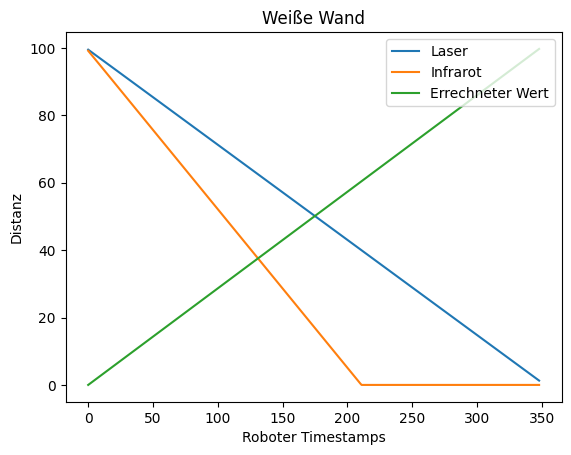

In [40]:
plotWall("Weiße Wand", df.laser_white, df.infrared_white, df.actual_white)

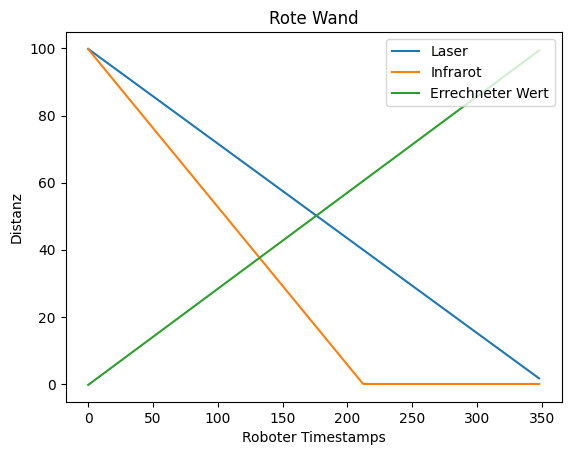

In [42]:
plotWall("Rote Wand", df.laser_red, df.infrared_red, df.actual_red)

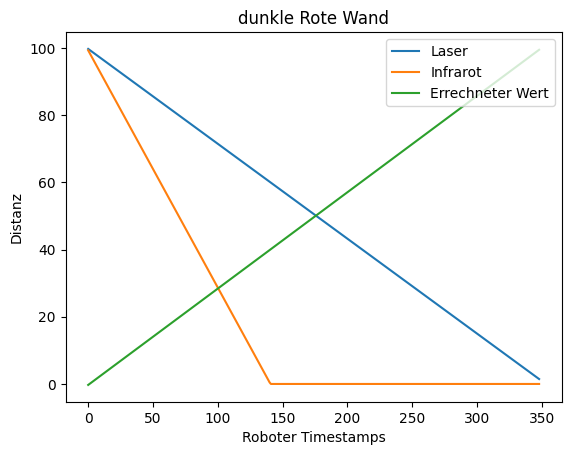

In [43]:
plotWall("dunkle Rote Wand", df.laser_dark_red, df.infrared_dark_red, df.actual_dark_red)

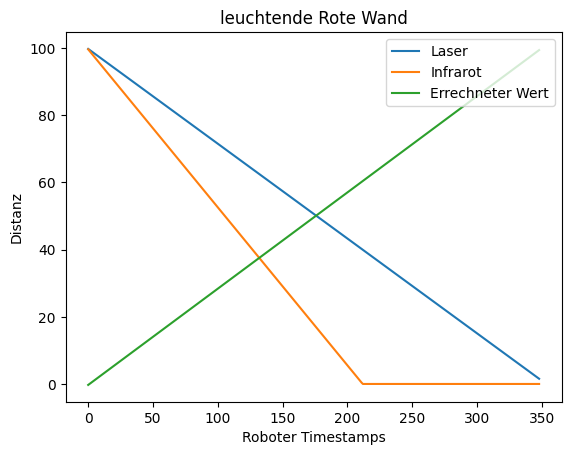

In [44]:
plotWall("leuchtende Rote Wand", df.laser_glowing_red, df.infrared_glowing_red, df.actual_glowing_red)

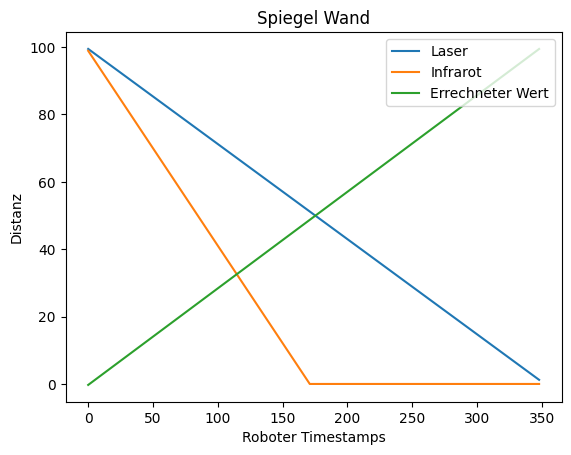

In [45]:
plotWall("Spiegel Wand", df.laser_mirror, df.infrared_mirror, df.actual_mirror)